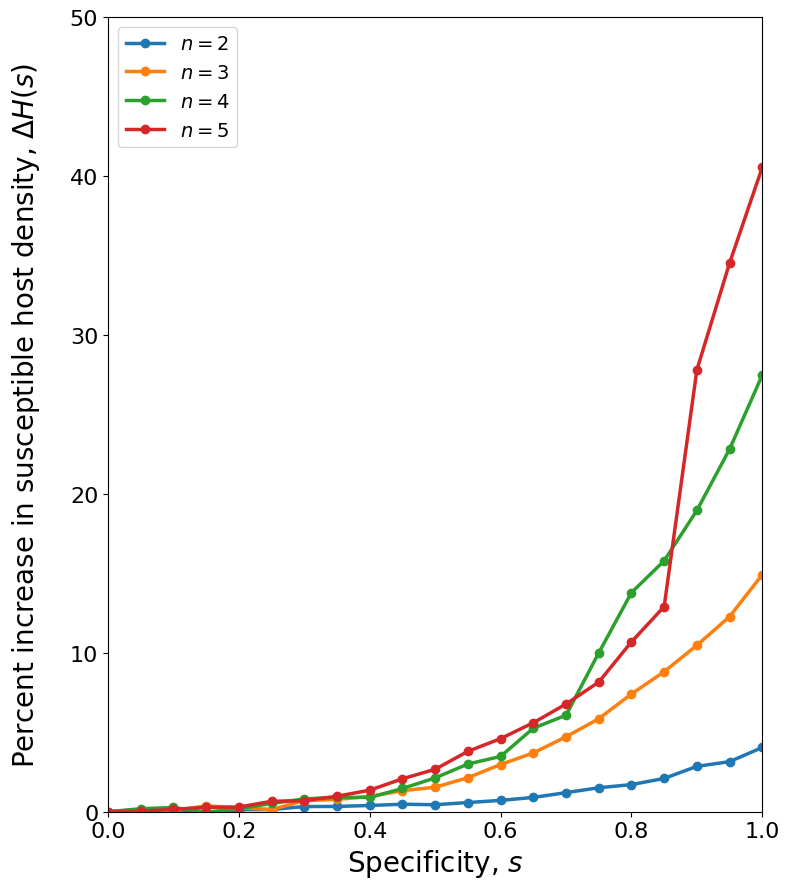

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("mean_host.csv") 

records = []
for n_val, dsub in df.groupby("n"):
    dsub = dsub.sort_values("s")                   # make sure s is 0…1
    baseline = dsub.loc[dsub["s"] == 0, "mean_H"].values[0]
    pct_change = 100 * (dsub["mean_H"] - baseline) / baseline

    records.append((n_val, dsub["s"].values, pct_change.values))

plt.figure(figsize=(8, 9))

for n_val, s_vec, pct_vec in records:
    plt.plot(s_vec, pct_vec, marker="o", linewidth=2.5, markersize=6, label=fr"$n={n_val}$")

# axes, labels, ticks, legend
plt.xlabel(r"Specificity, $s$", fontsize=20)
plt.ylabel(r"Percent increase in susceptible host density, $\Delta H(s)$", fontsize=20, labelpad=20)
plt.xticks(fontsize=16)  # increased x-tick font size
plt.yticks(fontsize=16)  # increased y-tick font size
plt.ylim(0, 50)
plt.xlim(0, 1)
plt.legend(loc="upper left", fontsize=14)
plt.tight_layout()
plt.savefig("mean_host.png", dpi=600)
plt.show()